In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784',version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = mnist['data']
Y = mnist['target']
Y = Y.astype(int)

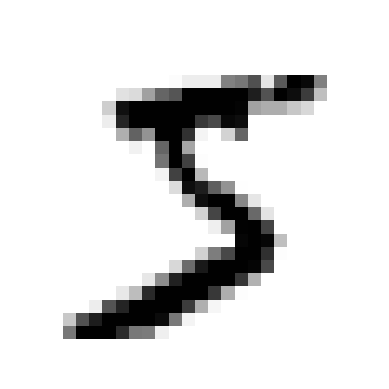

In [7]:
algarismo = X.iloc[0].values.reshape(28,28)
plt.imshow(algarismo,cmap='binary')
plt.axis('off')
plt.show()

In [8]:
Y.loc[Y==8].index[0]

17

&nbsp;

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import *
from sklearn.base            import BaseEstimator

In [10]:
xtrain , xtest , ytrain , ytest =  train_test_split(X,Y,random_state=0,train_size=60_000)

In [11]:
xtrain.shape,xtest.shape

((60000, 784), (10000, 784))

Classificar 8

In [12]:
index = ytest.loc[ytest == 8].index.tolist()

In [13]:
ytrain8 = (ytrain == 8)
ytest8  = (ytest  == 8)

In [14]:
gradEsto =  SGDClassifier(random_state=42)
gradEsto.fit(xtrain,ytrain8)

SGDClassifier(random_state=42)

In [15]:
gradEsto.predict([X.iloc[17]])

array([ True])

Tentar classificar 8 todos

In [16]:
gradEsto =  SGDClassifier(random_state=42)
gradEsto.fit(xtrain,ytrain8)

SGDClassifier(random_state=42)

In [17]:
predGrad = gradEsto.predict(xtest) 
predGrad

array([ True, False, False, ..., False, False, False])

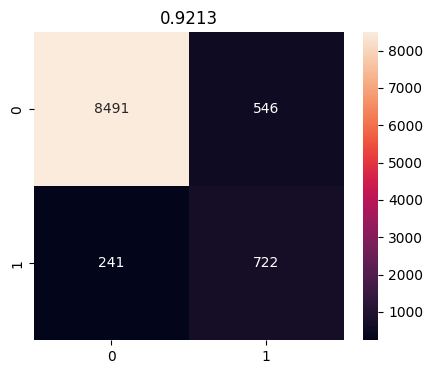

In [18]:
plt.figure(figsize=(5,4))
sea.heatmap( confusion_matrix(ytest8,predGrad),annot=True,fmt='' )
plt.title(accuracy_score(ytest8,predGrad))
plt.show()

In [19]:
print(classification_report(ytest8,predGrad))

              precision    recall  f1-score   support

       False       0.97      0.94      0.96      9037
        True       0.57      0.75      0.65       963

    accuracy                           0.92     10000
   macro avg       0.77      0.84      0.80     10000
weighted avg       0.93      0.92      0.93     10000



In [20]:
class Never8Classifier(BaseEstimator):
    def fit(self,X,Y=None):
        return self
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=int)

In [21]:
x = Never8Classifier().fit(xtrain,ytrain8)
p =  x.predict(xtest)
print( classification_report(ytest8,p))


              precision    recall  f1-score   support

       False       0.90      1.00      0.95      9037
        True       0.00      0.00      0.00       963

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.82      0.90      0.86     10000

